In [2]:
#### imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [242]:
df=pd.read_csv("data.csv",sep='\,',engine='python')
data.shape

(944, 10)

In [243]:
df.sample(2)

,"""footfall",atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,"fail"""
124,"""0",4,5,3,6,4,76,7,8,"1"""
101,"""27",2,6,1,6,5,35,5,7,"1"""


In [244]:
df['footfall']=df['"footfall'].str.replace('"',"").astype('int64')
df['fail']=df['fail"'].str.replace('"',"").astype('int64')
df.shape

(944, 12)

In [245]:
df.sample(2)

,"""footfall",atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,"fail""",footfall,fail
534,"""0",7,2,2,7,1,55,3,19,"0""",0,0
40,"""180",6,5,5,5,0,51,2,3,"0""",180,0


In [246]:
df=df.drop(['"footfall','fail"'],axis=1)
df.sample(2)

,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,footfall,fail
438,2,4,2,6,1,45,3,17,0,0
349,1,6,1,5,6,21,4,16,22,1


In [247]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   atemp        944 non-null    int64
 1   selfLR       944 non-null    int64
 2   ClinLR       944 non-null    int64
 3   DoleLR       944 non-null    int64
 4   PID          944 non-null    int64
 5   outpressure  944 non-null    int64
 6   inpressure   944 non-null    int64
 7   temp         944 non-null    int64
 8   footfall     944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [248]:
df.dtypes

atemp          int64
selfLR         int64
ClinLR         int64
DoleLR         int64
PID            int64
outpressure    int64
inpressure     int64
temp           int64
footfall       int64
fail           int64
dtype: object

In [249]:
##now check the % of null values
df.isna().mean()*100

atemp          0.0
selfLR         0.0
ClinLR         0.0
DoleLR         0.0
PID            0.0
outpressure    0.0
inpressure     0.0
temp           0.0
footfall       0.0
fail           0.0
dtype: float64

>cleary see there is no null values so we can go to check for duplicates


In [250]:
## checking the duplicates

df.duplicated().sum()

1

In [251]:
### removing the duplkoicate value
df=df.drop_duplicates()

In [252]:
df.duplicated().sum()

0

> Now our dataset is No Null values and No duplicates

In [254]:
df.sample(2)

,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,footfall,fail
492,1,4,3,5,4,37,6,18,9,1
164,4,5,2,5,5,83,3,11,900,1


In [255]:
df.shape

(943, 10)

In [256]:
### now check the outliers

df.describe().T

,count,mean,std,min,25%,50%,75%,max
atemp,943.0,3.726405,2.678334,0.0,1.0,3.0,7.0,7.0
selfLR,943.0,4.326617,1.438551,1.0,3.0,4.0,6.0,7.0
ClinLR,943.0,2.939555,1.384458,1.0,2.0,3.0,4.0,7.0
DoleLR,943.0,5.393425,1.269869,1.0,5.0,6.0,6.0,7.0
PID,943.0,2.844115,2.273751,0.0,1.0,2.0,5.0,6.0
outpressure,943.0,47.042418,16.431816,19.0,34.0,44.0,58.0,91.0
inpressure,943.0,4.564157,1.599452,1.0,3.0,4.0,6.0,7.0
temp,943.0,16.326617,5.976014,1.0,14.0,17.0,21.0,24.0
footfall,943.0,306.673383,1083.144024,0.0,1.0,22.0,110.0,7300.0
fail,943.0,0.416755,0.493283,0.0,0.0,0.0,1.0,1.0


>from above statics the column footfall having the outliers So need to check that column


<AxesSubplot:>

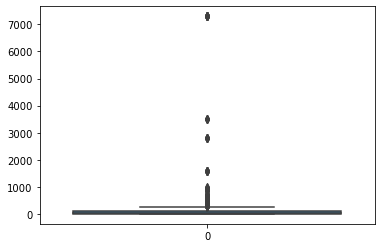

In [257]:
sns.boxplot(data=df['footfall'])

In [258]:
##removing the outliers
df=df[df['footfall']<=1500]

In [259]:
df.sample(5)

,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,footfall,fail
777,3,5,2,7,5,42,6,22,0,0
684,7,3,3,6,0,62,6,21,14,0
221,7,4,1,6,5,66,3,13,11,1
602,5,4,5,7,1,50,5,20,640,0
531,3,3,4,5,1,44,6,19,45,0


In [260]:
df.shape

(896, 10)

<AxesSubplot:>

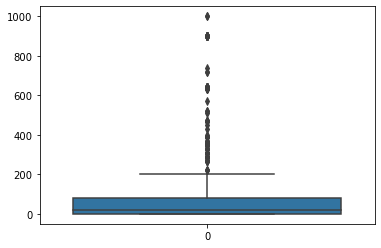

In [261]:
sns.boxplot(data=df['footfall'])

In [262]:
df.sample(5)

,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,footfall,fail
706,0,6,3,6,6,34,7,21,40,1
773,6,3,5,6,4,37,6,21,0,0
127,7,2,3,5,0,67,3,9,0,0
389,1,5,3,2,0,65,2,16,51,0
887,3,2,4,6,0,27,5,24,12,0


In [263]:
df.fail.value_counts()

0    517
1    379
Name: fail, dtype: int64

In [264]:
df.columns

Index(['atemp', 'selfLR', 'ClinLR', 'DoleLR', 'PID', 'outpressure',
       'inpressure', 'temp', 'footfall', 'fail'],
      dtype='object')

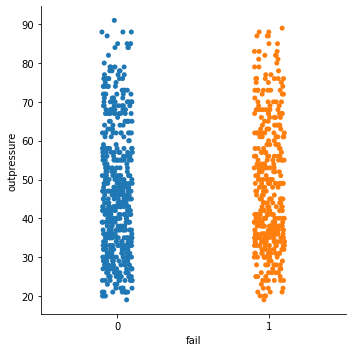

In [265]:
sns.catplot(x='fail',y="outpressure",data=df)

In [266]:
df.sample(5)

,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,footfall,fail
138,3,2,3,6,3,42,3,10,0,0
7,1,5,4,5,4,21,4,1,31,0
166,7,7,1,2,0,62,2,11,2,0
635,1,2,3,6,0,41,6,20,170,0
199,7,6,2,5,5,73,3,12,1,1


<AxesSubplot:>

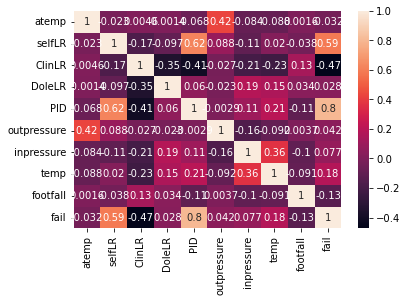

In [388]:
sns.heatmap(data=df.corr(),annot=True)

In [267]:
##separate the input and output variables
X=df.drop('fail',axis=1)
y=df.fail

In [269]:
X.shape

(896, 9)

In [270]:
y.shape

(896,)

In [271]:
from sklearn.model_selection import train_test_split

In [272]:
###splitting the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.27,random_state=42)

In [273]:
X_train.shape,X_test.shape

((654, 9), (242, 9))

In [274]:
###model1=logistic regression
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)
y1_predict=model1.predict(X_test)

In [275]:
y1_predict

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve

In [276]:
##check the accuracy score
print(accuracy_score(y_test,y1_predict))

0.8966942148760331


In [277]:
#print the classification report
print(classification_report(y_test,y1_predict))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       140
           1       0.87      0.88      0.88       102

    accuracy                           0.90       242
   macro avg       0.89      0.89      0.89       242
weighted avg       0.90      0.90      0.90       242



<AxesSubplot:>

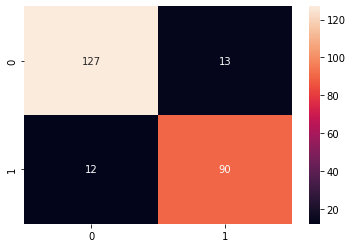

In [391]:
from sklearn.metrics import confusion_matrix
sns.heatmap(data=confusion_matrix(y_test,y1_predict),annot=True,fmt='d')

In [278]:
y_test[5]

0

In [280]:
y1_predict[5]

0

In [281]:
#model2=Naivebayers
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(X_train,y_train)
y2_predict=model2.predict(X_test)

In [282]:
print(accuracy_score(y_test,y2_predict))

0.9090909090909091


In [283]:
print(classification_report(y_test,y2_predict))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       140
           1       0.90      0.88      0.89       102

    accuracy                           0.91       242
   macro avg       0.91      0.91      0.91       242
weighted avg       0.91      0.91      0.91       242



<AxesSubplot:>

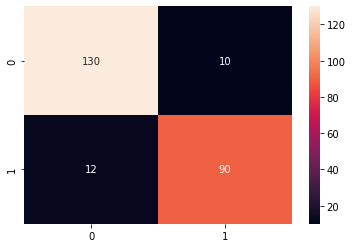

In [392]:
sns.heatmap(data=confusion_matrix(y_test,y2_predict),annot=True,fmt='d')

In [284]:
##model3=SVM
from sklearn.svm import SVC
model3=SVC(probability=True)
model3.fit(X_train,y_train)
y3_predict=model3.predict(X_test)

In [285]:
print(accuracy_score(y_test,y3_predict))

0.5785123966942148


In [286]:
print(classification_report(y_test,y3_predict))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73       140
           1       0.00      0.00      0.00       102

    accuracy                           0.58       242
   macro avg       0.29      0.50      0.37       242
weighted avg       0.33      0.58      0.42       242



<AxesSubplot:>

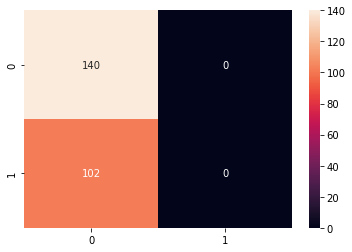

In [393]:
sns.heatmap(data=confusion_matrix(y_test,y3_predict),annot=True,fmt='d')

In [287]:
##model4=KNN
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier()
model4.fit(X_train,y_train)
y4_predict=model4.predict(X_test)

In [288]:
print(accuracy_score(y_test,y4_predict))

0.7066115702479339


In [289]:
print(classification_report(y_test,y4_predict))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       140
           1       0.66      0.62      0.64       102

    accuracy                           0.71       242
   macro avg       0.70      0.69      0.70       242
weighted avg       0.70      0.71      0.70       242



<AxesSubplot:>

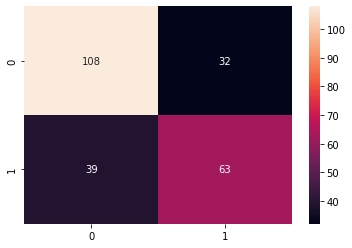

In [394]:
sns.heatmap(data=confusion_matrix(y_test,y4_predict),annot=True,fmt='d')

In [290]:
###now find the Area under the curve
AUC1=roc_auc_score(y_test,model1.predict_proba(X_test)[:,1])
AUC2=roc_auc_score(y_test,model2.predict_proba(X_test)[:,1])
AUC3=roc_auc_score(y_test,model3.predict_proba(X_test)[:,1])
AUC4=roc_auc_score(y_test,model4.predict_proba(X_test)[:,1])


In [291]:
print('model1: logistic regression AUC: {}'.format(round(AUC1,3)*100)+'%')
print('model1:  GaussinNB AUC: {}'.format(round(AUC2,3)*100)+'%')
print('model1: SVC AUC: {}'.format(round(AUC3,3)*100)+'%')
print('model1: KNeighbors AUC: {}'.format(round(AUC4,3)*100)+'%')

model1: logistic regression AUC: 96.0%
model1:  GaussinNB AUC: 95.7%
model1: SVC AUC: 89.5%
model1: KNeighbors AUC: 79.4%


In [292]:
##now find the false positive rate and trupositive rate and threshold values of the all the models
fpr1, tpr1, th1=roc_curve(y_test,model1.predict_proba(X_test)[:,1])
fpr2, tpr2, th2=roc_curve(y_test,model2.predict_proba(X_test)[:,1])
fpr3, tpr3, th3=roc_curve(y_test,model3.predict_proba(X_test)[:,1])
fpr4, tpr4, th3=roc_curve(y_test,model4.predict_proba(X_test)[:,1])

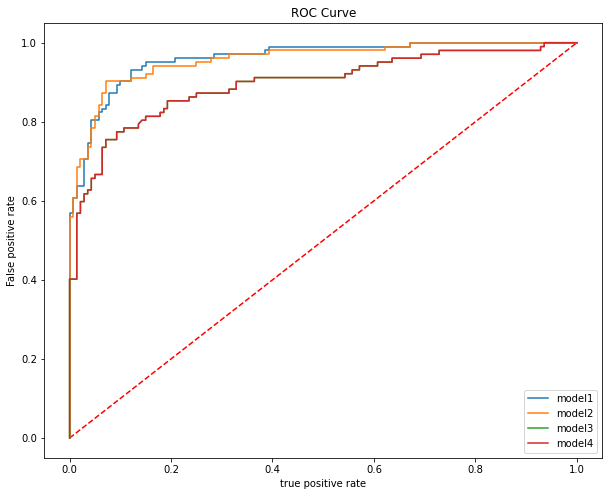

In [294]:
###ploot the auc curves
fig=plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr1, tpr1, label='model1')
plt.plot(fpr2, tpr2, label='model2')
plt.plot(fpr3, tpr3, label='model3')
plt.plot(fpr3, tpr3, label='model4')
plt.xlabel('true positive rate')
plt.ylabel('False positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [295]:
df.head(5)

,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,footfall,fail
0,7,7,1,6,6,36,3,1,0,1
1,1,3,3,5,1,20,4,1,190,0
2,7,2,2,6,1,24,6,1,31,0
3,4,3,4,5,1,28,6,1,83,0
4,7,5,6,4,0,68,6,1,640,0


# identifying the shift performance


In [325]:
## for change in any data in future it will effect the accuracy so we need to check which variable is effect when data chanege
###so we split the deata into trasining and testing data from given data
train,test=train_test_split(df,test_size=0.3,random_state=42)

In [326]:
train.head(2)

,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,footfall,fail
690,7,5,2,6,6,45,4,21,0,1
184,0,4,6,3,3,46,5,12,0,0


In [327]:
###remove the target variable
train=train.drop('fail',axis=1)
test=test.drop('fail',axis=1)

In [328]:
train.head(5)

,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,footfall
690,7,5,2,6,6,45,4,21,0
184,0,4,6,3,3,46,5,12,0
475,7,6,4,4,0,74,3,18,3
332,7,3,2,7,1,67,3,15,270
351,1,6,2,5,5,35,5,16,0


In [330]:
## create thae label in training data with 1 and testing data with 0
train['new_y']=1  
test['new_y']=0

In [331]:
train.sample(2)

,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,footfall,new_y
44,7,4,4,7,2,43,5,3,100,1
427,4,4,3,5,1,43,5,17,2,1


In [332]:
test.sample(2)

,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,footfall,new_y
381,5,2,4,7,1,41,3,16,51,0
599,4,5,3,6,5,62,4,20,13,0


In [333]:
##take the random samples and randomly
training=train.sample(2000,random_state=32,replace=True)
testing=test.sample(2000,random_state=36,replace=True)

In [334]:
training.shape

(2000, 10)

In [335]:
testing.shape

(2000, 10)

In [336]:
###combine the two traing data and testing data it will create the neww dataset with new target variable New_y
final_df=training.append(testing)

In [337]:
final_df.shape

(4000, 10)

In [338]:
y_new=final_df['new_y']
X_new=final_df.drop('new_y',axis=1)

In [339]:
y_new.shape

(4000,)

In [340]:
X_new.shape

(4000, 9)

In [341]:
###take the model for valiadating the shift data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [342]:
model=RandomForestClassifier(n_estimators=50,max_depth=5,min_samples_leaf=5)
drop_list=[]
score_list=[]
tem=-1
for i in X_new.columns[:]:
    tem+=1
    score=cross_val_score(model,pd.DataFrame(X_new[i]),y_new,cv=2,scoring='roc_auc')
if (np.mean(score) < 0.8):
    drop_list.append(i)
    score_list.append(np.mean(score))
    print('checking feature no ',tem)
    print(i,np.mean(score))

checking feature no  8
footfall 0.60868725


>>feature no 8 nothing but temparature will effect the performance of the sensor


In [123]:
#####model2 and model1 gives the better performance
### heare i select the model2

In [364]:
y_test[256]

0

In [395]:
y2_predict[y_test[256]]

0

In [366]:
y_test[666]

1

In [367]:
y2_predict[y_test[666]]

0

In [368]:
####final step for prediction
X_test.sample(2)

,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,footfall
850,6,6,3,6,6,55,6,23,75
341,7,5,5,4,0,76,2,15,0


In [369]:
### create function for prediction
def prediction(atemp,selfLR,CliLR,DoleLR,PID,outpressure,inpressure,temp,footfall):
    footfall=footfall
    atemp=atemp
    selfLR=selfLR
    CliLR=CliLR
    DoleLR=DoleLR
    PID=PID
    outpressure=outpressure
    inpressure=inpressure
    temp=temp
    result=model2.predict([[footfall,atemp,selfLR,CliLR,DoleLR,PID,outpressure,inpressure,temp]])
    
    if result[0] == 0:
        print('STATUS: equipment is failed')
    else:
        print('STATUS: equipment working fine')
    

In [370]:
prediction(0,5,2,2,6,2,44,7,23)

STATUS: equipment is failed


In [377]:
##check with sample
df.sample(1)

,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,footfall,fail
121,2,4,2,6,6,21,3,8,170,1


In [378]:
prediction(2,4,2,6,6,21,3,8,170)

STATUS: equipment working fine


In [385]:
### check with sample
df.sample(1)

,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,footfall,fail
754,7,5,3,4,2,58,7,21,22,0


In [386]:
prediction(7,5,3,4,2,58,7,21,22)

STATUS: equipment is failed
